# Clustering and Visulization
## using sentence_transformers
---
This is a simple application for sentence embeddings: clustering
Sentences are mapped to sentence embeddings and then multiple clustering algorithms are applied

In [1]:
from sentence_transformers import SentenceTransformer

In [47]:
embedder = SentenceTransformer('paraphrase-distilroberta-base-v1')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]

corpus_embeddings = embedder.encode(corpus)

# Visualization
---
Here we cover the code for visualizing the clusters generated by kmeans, hierarchical and fast-clustering

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import ipyvolume as ipv

In [4]:
def plot_2d(red_algorithm, num_clusters, x, y, label):
    # print
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(f'{red_algorithm} 1', fontsize = 15)
    ax.set_ylabel(f'{red_algorithm} 2', fontsize = 15)
    ax.set_title(f'2 Component {red_algorithm}', fontsize = 20)

    from matplotlib.lines import Line2D
    
    targets = [f'Cluster {i}' for i in range(num_clusters)] # + ['Centroids']
    markers = list(Line2D.markers.keys())[:num_clusters] # + ['$c$']
    
    print(f"targets: {targets}")
    print(f"markers: {markers}")
    

    for idx, (target, marker) in enumerate(zip(targets, markers)):
        indicesToKeep = label == idx # finalDf['target'] == idx
        ax.scatter(x[indicesToKeep], # finalDf.loc[indicesToKeep, f'{red_algorithm} 1'],
                   y[indicesToKeep], # finalDf.loc[indicesToKeep, f'{red_algorithm} 2'],
                   marker = marker,
                   # c = color,
                   s = 50)
    ax.legend(targets)
    ax.grid()

In [5]:
def plot_3d(red_algorithm, num_clusters, x, y, z, label):
    # print
    fig = plt.figure(figsize = (8,8))
    ax = plt.axes(projection='3d')
    # ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(f'{red_algorithm} 1', fontsize = 15)
    ax.set_ylabel(f'{red_algorithm} 2', fontsize = 15)
    ax.set_zlabel(f'{red_algorithm} 3', fontsize = 15)
    ax.set_title(f'3 Component {red_algorithm}', fontsize = 20)

    from matplotlib.lines import Line2D
    
    targets = [f'Cluster {i}' for i in range(num_clusters)] #  + ['Centroids']
    markers = list(Line2D.markers.keys())[:num_clusters] # + ['$c$']
    
    print(f"targets: {targets}")
    print(f"markers: {markers}")

    for idx, (target, marker) in enumerate(zip(targets, markers)):
        indicesToKeep = label == idx # finalDf['target'] == idx
        ax.scatter(x[indicesToKeep], # finalDf.loc[indicesToKeep, f'{red_algorithm} 1'],
                   y[indicesToKeep], # finalDf.loc[indicesToKeep, f'{red_algorithm} 2'],
                   z[indicesToKeep], # finalDf.loc[indicesToKeep, f'{red_algorithm} 3'],
                   marker = marker,
                   # c = color,
                   s = 50)
    ax.legend(targets)
    ax.grid()

In [42]:
def plot_3d_interactive(red_algorithm, num_clusters, x, y, z, label):
    # print
    ipv.quickscatter(x, y, z, size=1, marker="sphere")

In [7]:
# scaler
from sklearn.preprocessing import StandardScaler

# dimensionality reduction
from sklearn.decomposition import PCA
from umap import UMAP
try:
    from MulticoreTSNE import MulticoreTSNE as TSNE
except:
    print("For reasonable computation time, install Multicore-TSNE!")
    from sklearn.manifold import TSNE

For reasonable computation time, install Multicore-TSNE!


In [43]:
def plot(red_algorithm, plot_dim, num_clusters, vectors, _labels):

    # print(f"***     Plot {plot_dim}D      ***")
    # perfect_half_spaces = ''*(10-len(red_algorithm))
    # print(f"* {perfect_half_spaces + red_algorithm + perfect_half_spaces} *")
    # print(f"num_clusters: {num_clusters}")
    # print(f"vectors (shape): {vectors.shape}")
    # print(f"_labels (shape): {_labels.shape}")
    # print("*"*25)
        
    _labels = _labels
    _vectors = StandardScaler().fit_transform(vectors)
    
    if red_algorithm == 'pca':
        algorithm = PCA(n_components=plot_dim)
    elif red_algorithm == 'tsne':
        algorithm = TSNE(n_components=plot_dim)
    elif red_algorithm == 'umap':
        algorithm = UMAP(n_components=plot_dim)
    else:
        raise ValueError(f"The PLOT algorithm {red_algorithm} is not supported, yet!")
    
    red_vectors = algorithm.fit_transform(_vectors)

    # dataframes from pandas
    principalDf = pd.DataFrame(data = red_vectors, columns = [f'{red_algorithm} {num+1}' for num in range(plot_dim)])
    labelDf =  pd.DataFrame(data = _labels, columns = ['target'])
    finalDf = pd.concat([principalDf, labelDf], axis = 1)
    
    if plot_dim == 2:
        plot_2d(red_algorithm, num_clusters, finalDf[f'{red_algorithm} 1'], finalDf[f'{red_algorithm} 2'], finalDf['target'])
    elif plot_dim == 3:
        plot_3d(red_algorithm, num_clusters, finalDf[f'{red_algorithm} 1'], finalDf[f'{red_algorithm} 2'], finalDf[f'{red_algorithm} 3'], finalDf['target'])
    elif plot_dim == 4:
        plot_3d_interactive(red_algorithm, num_clusters, finalDf[f'{red_algorithm} 1'], finalDf[f'{red_algorithm} 2'], finalDf[f'{red_algorithm} 3'], finalDf['target'])
    else:
        raise ValueError(f"Only 2D and 3D PLOTs are supported, not {plot_dim}D!")        

# K-means
---
Use of k-mean clustering.
Sentences are mapped to sentence embeddings and then k-mean clustering is applied.

In [44]:
from sklearn.cluster import KMeans

In [48]:
# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [49]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [50]:
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i)
    print(cluster)
    print("")

Cluster  0
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  2
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  3
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  4
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']



In [51]:
vectors = corpus_embeddings
_labels = clustering_model.labels_

targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']


ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

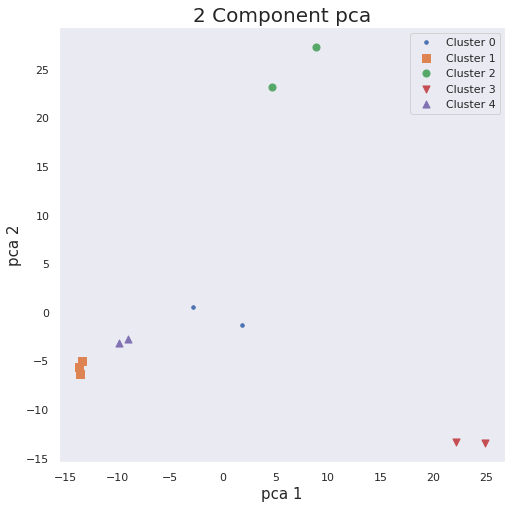

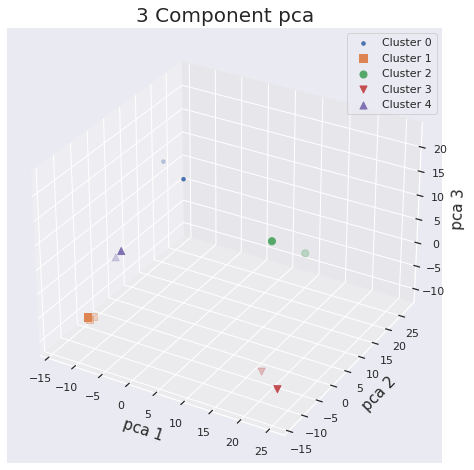

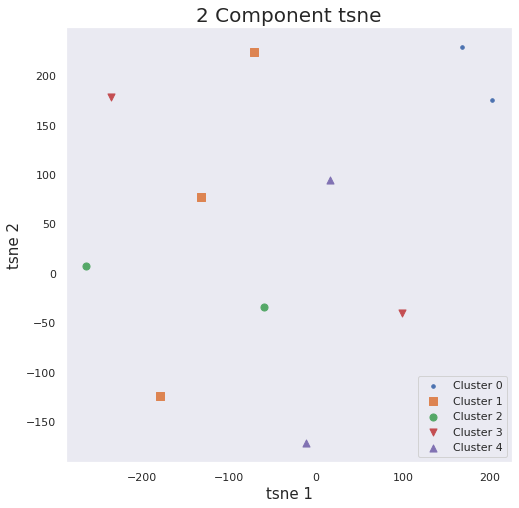

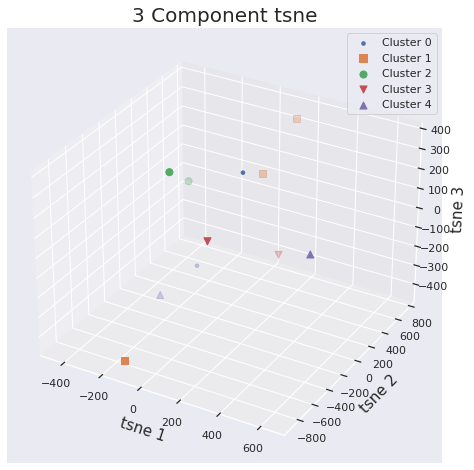

In [52]:
algorithms = ['pca', 'tsne', 'umap'] 
dimentions = [ 2, 3, 4 ]

for red_algorithm in algorithms:
    for plot_dim in dimentions:
        plot(red_algorithm, plot_dim, num_clusters, vectors, _labels)

# Hierarchical clustering
---
Use of Hierarchical clustering.
Sentences are mapped to sentence embeddings and then agglomerative clustering with a threshold is applied.
This algorithm can be useful `if the number of clusters is unknown`. By the threshold, we can control if we want to have many small and fine-grained cluster or few coarse-grained clusters.

In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [22]:
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [23]:
# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [24]:
clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [25]:
for i, cluster in clustered_sentences.items():
    print("Cluster ", i)
    print(cluster)
    print("")

Cluster  0
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  2
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  3
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  1
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']



In [26]:
num_clusters = len(clustered_sentences)
vectors = corpus_embeddings
_labels = clustering_model.labels_

targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']


/home/vivoli/.local/lib/python3.7/site-packages/umap_learn-0.5.1-py3.7.egg/umap/umap_.py:2251: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']


/home/vivoli/.local/lib/python3.7/site-packages/umap_learn-0.5.1-py3.7.egg/umap/umap_.py:2251: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
markers: ['.', ',', 'o', 'v', '^']


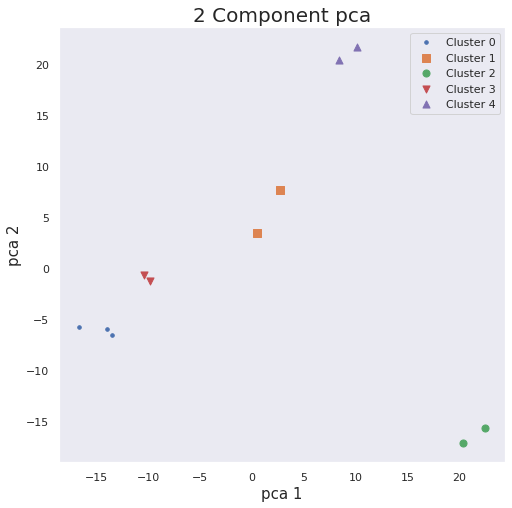

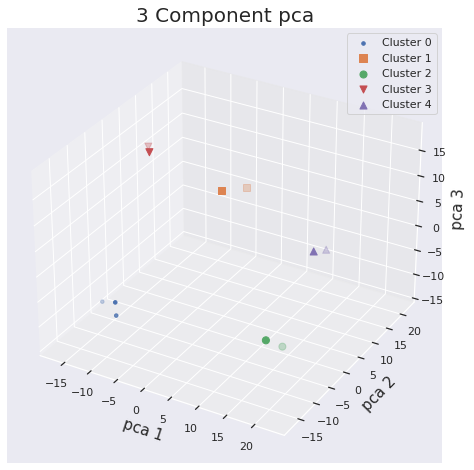

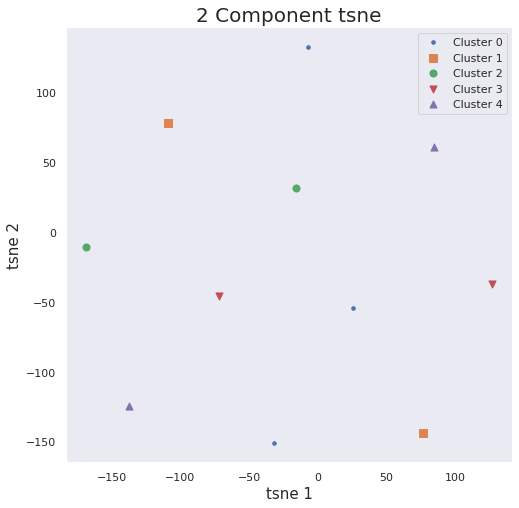

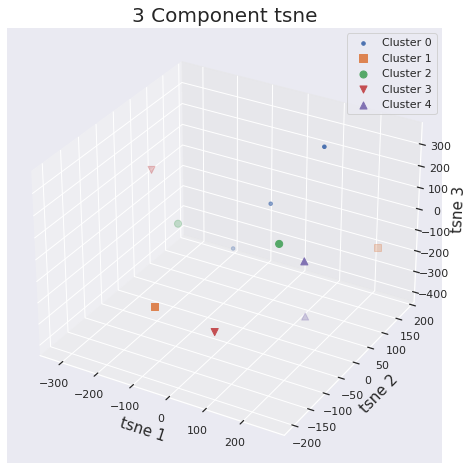

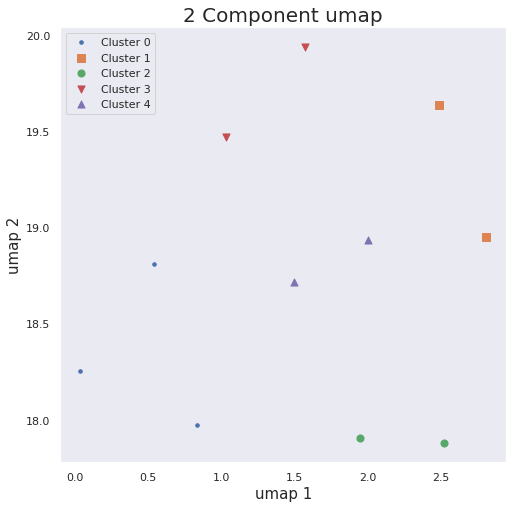

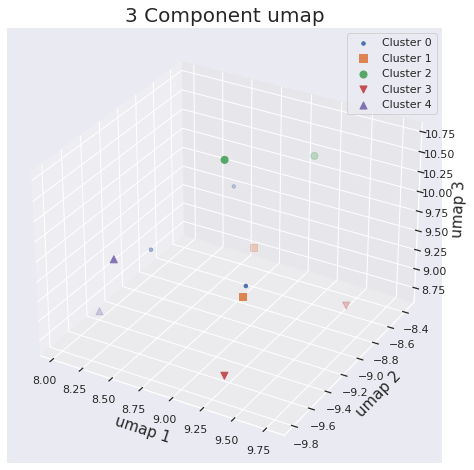

In [27]:
algorithms = ['pca', 'tsne', 'umap'] 
dimentions = [ 2, 3 ]

for red_algorithm in algorithms:
    for plot_dim in dimentions:
        plot(red_algorithm, plot_dim, num_clusters, vectors, _labels)

# Fast-Clustering
---
This is a more complex example on performing `clustering on large scale dataset`.
This examples find in a large set of sentences local communities, i.e., `groups of sentences that are highly similar`. 
You can freely configure the threshold what is considered as similar. 
A `high threshold` will only find `extremely similar sentences`, a `lower threshold` will find more sentence that are `less similar`.
A second parameter is `'min_community_size'`: Only communities with at least a certain number of sentences will be returned.
The method for finding the communities is extremely fast, for clustering `50k sentences it requires only 5 seconds` (plus embedding comuptation).
In this example, we download a large set of questions from Quora and then find similar questions in this set.

In [53]:
from sentence_transformers import util
import numpy as np
import os
import csv
import pickle
import time

In [54]:
def community_detection(embeddings, threshold=0.75, min_community_size=10, init_max_size=1000):
    """
    Function for Fast Community Detection
    Finds in the embeddings all communities, i.e. embeddings that are close (closer than threshold).
    Returns only communities that are larger than min_community_size. The communities are returned
    in decreasing order. The first element in each list is the central point in the community.
    """

    # Compute cosine similarity scores
    cos_scores = util.pytorch_cos_sim(embeddings, embeddings)

    # Minimum size for a community
    top_k_values, _ = cos_scores.topk(k=min_community_size, largest=True)

    # Filter for rows >= min_threshold
    extracted_communities = []
    for i in range(len(top_k_values)):
        if top_k_values[i][-1] >= threshold:
            new_cluster = []

            # Only check top k most similar entries
            top_val_large, top_idx_large = cos_scores[i].topk(k=init_max_size, largest=True)
            top_idx_large = top_idx_large.tolist()
            top_val_large = top_val_large.tolist()

            if top_val_large[-1] < threshold:
                for idx, val in zip(top_idx_large, top_val_large):
                    if val < threshold:
                        break

                    new_cluster.append(idx)
            else:
                # Iterate over all entries (slow)
                for idx, val in enumerate(cos_scores[i].tolist()):
                    if val >= threshold:
                        new_cluster.append(idx)

            extracted_communities.append(new_cluster)

    # Largest cluster first
    extracted_communities = sorted(extracted_communities, key=lambda x: len(x), reverse=True)

    # Step 2) Remove overlapping communities
    unique_communities = []
    extracted_ids = set()

    for community in extracted_communities:
        add_cluster = True
        for idx in community:
            if idx in extracted_ids:
                add_cluster = False
                break

        if add_cluster:
            unique_communities.append(community)
            for idx in community:
                extracted_ids.add(idx)

    return unique_communities

In [55]:
# Model for computing sentence embeddings. We use one trained for similar questions detection
model = SentenceTransformer('distilbert-base-nli-stsb-quora-ranking')

In [56]:
# We donwload the Quora Duplicate Questions Dataset (https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs)
# and find similar question in it
url = "http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv"
dataset_path = "/home/vivoli/Thesis/data/clustering-samples/quora_duplicate_questions.tsv"
max_corpus_size = 50000 # We limit our corpus to only the first 50k questions
embedding_cache_path = '/home/vivoli/Thesis/data/clustering-samples/quora-embeddings-size-{}.pkl'.format(max_corpus_size)

In [57]:
#Check if embedding cache path exists
if not os.path.exists(embedding_cache_path):
    # Check if the dataset exists. If not, download and extract
    # Download dataset if needed
    if not os.path.exists(dataset_path):
        print("Download dataset")
        util.http_get(url, dataset_path)

    # Get all unique sentences from the file
    corpus_sentences = set()
    with open(dataset_path, encoding='utf8') as fIn:
        reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_MINIMAL)
        for row in reader:
            corpus_sentences.add(row['question1'])
            if len(corpus_sentences) >= max_corpus_size:
                break

            corpus_sentences.add(row['question2'])
            if len(corpus_sentences) >= max_corpus_size:
                break

    corpus_sentences = list(corpus_sentences)
    print("Encode the corpus. This might take a while")
    corpus_embeddings = model.encode(corpus_sentences, show_progress_bar=True, convert_to_numpy=True)

    print("Store file on disc")
    with open(embedding_cache_path, "wb") as fOut:
        pickle.dump({'sentences': corpus_sentences, 'embeddings': corpus_embeddings}, fOut)
else:
    print("Load pre-computed embeddings from disc")
    with open(embedding_cache_path, "rb") as fIn:
        cache_data = pickle.load(fIn)
        corpus_sentences = cache_data['sentences']
        corpus_embeddings = cache_data['embeddings']

Load pre-computed embeddings from disc


In [58]:
print("Start clustering")
start_time = time.time()

#Two parameter to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements (30 similar sentences)
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = community_detection(corpus_embeddings, min_community_size=25, threshold=0.95)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

Start clustering
Clustering done after 5.57 sec


In [59]:
_len = 0
for cluster in clusters:
    _len += len(cluster)
print(_len)

900


In [60]:
#Print all cluster / communities
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster:
        print("\t", corpus_sentences[sentence_id])


Cluster 1, #109 Elements 
	 How can I speak fluent english and get confident?
	 How can I speak English fluently and fast?
	 How can I speak fluent English with accuracy?
	 How the way to speak english fluently?
	 How do I get to speak fluently English?
	 How do I speak English fluently?
	 How can I speaking fluently speaking English?
	 How can I speak fluent english with confidence?
	 How I can speak English with fluency?
	 HOw do I speak Fluent English?
	 How To speak English Fluently ?
	 How do I talk English fluently?
	 How can I improve fluency in English?
	 How can I improve in English?
	 How do I improve my English speaking?
	 How I can improve my English communication?
	 How will I improve my spoken English?
	 How can I become fluent in English?
	 How do I speak English fluently at an interview?
	 How could I be fluent in English?
	 How can I improve my communication in English?
	 How could I improve my English?
	 How can I become fluent in English faster?
	 How do I speak Eng

In [61]:
num_clusters = len(clusters)
vectors = corpus_embeddings[np.asarray(np.concatenate(clusters).flat)]
_labels = np.asarray(np.concatenate([[idx]*len(cluster) for idx, cluster in enumerate(clusters)]).flat)

targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15', 'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19', 'Cluster 20']
markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15', 'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19', 'Cluster 20']
markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']
targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 

/home/vivoli/miniconda3/envs/arxiv-manipulation/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15', 'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19', 'Cluster 20']
markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']


/home/vivoli/miniconda3/envs/arxiv-manipulation/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


targets: ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15', 'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19', 'Cluster 20']
markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']


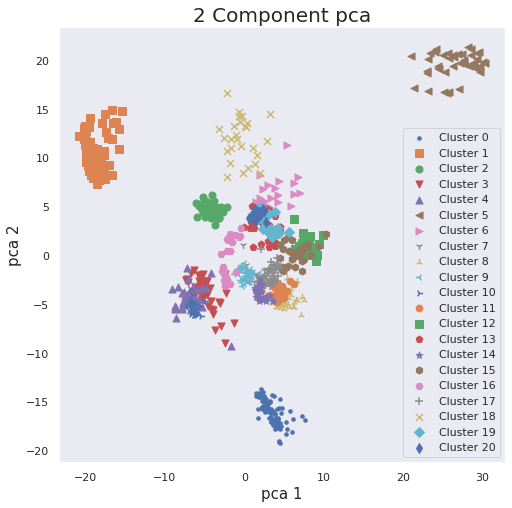

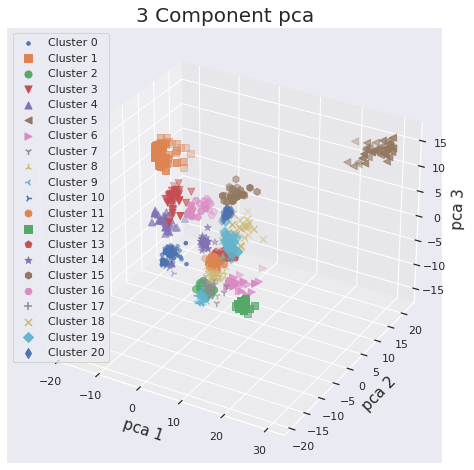

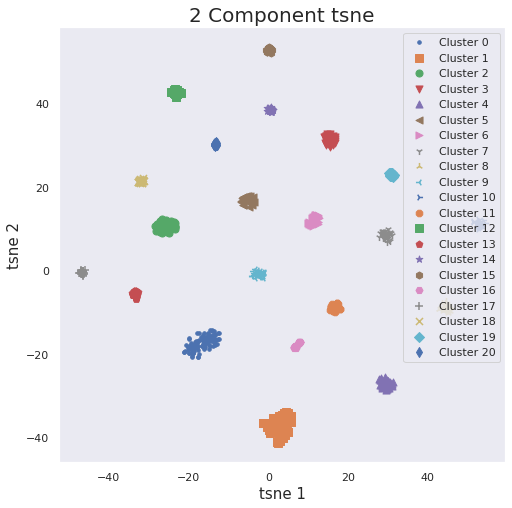

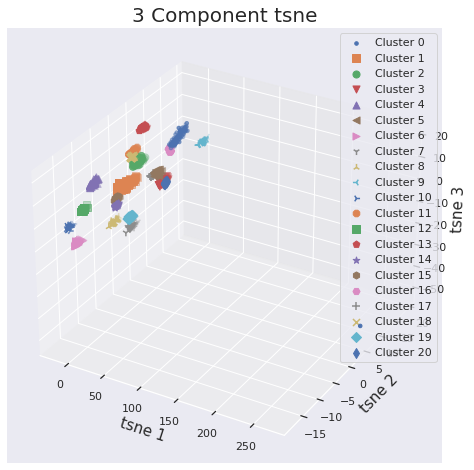

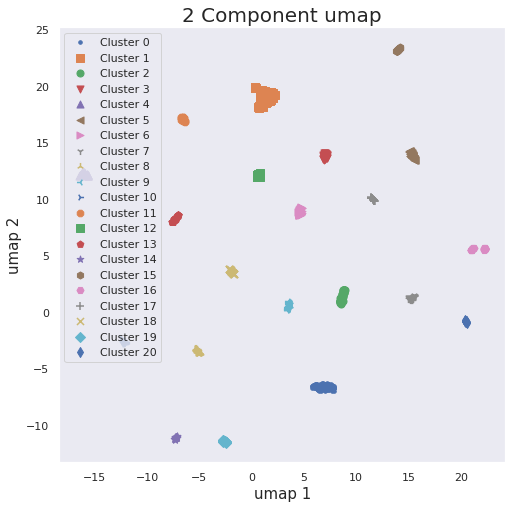

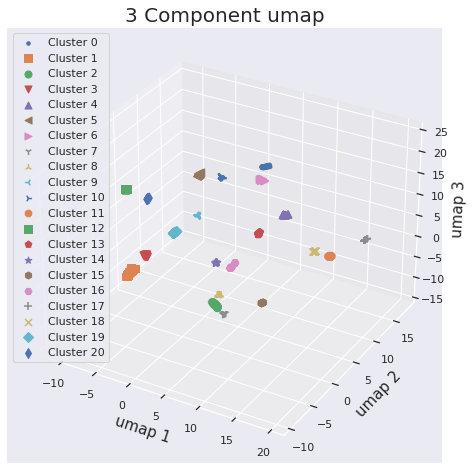

In [62]:
algorithms = ['pca', 'tsne', 'umap'] 
dimentions = [ 2, 3 ]

for red_algorithm in algorithms:
    for plot_dim in dimentions:
        plot(red_algorithm, plot_dim, num_clusters, vectors, _labels)

# UMAP
---
---
Incredible: it works !

In [63]:
# !conda install numpy scipy -y; conda install scikit-learn -y; conda install numba -y; pip install umap-learn
# !cd utils; wget https://github.com/lmcinnes/umap/archive/master.zip; unzip master.zip; rm master.zip; cd umap-master; conda install scikit-learn numba -y; python setup.py install
# !pip install scipy
# !cd utils; cd umap-master; pip install --user -r requirements.txt; python setup.py install --user
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

In [64]:
np.random.seed(42)
data = np.random.rand(800, 4)

In [65]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 6.62 s, sys: 79.9 ms, total: 6.7 s
Wall time: 1.96 s


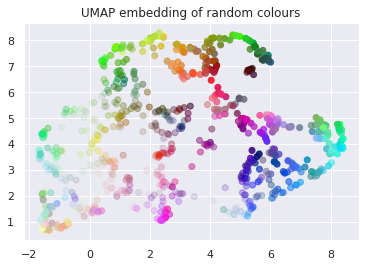

In [66]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');

In [67]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

/home/vivoli/.local/lib/python3.7/site-packages/umap_learn-0.5.1-py3.7.egg/umap/spectral.py:259: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


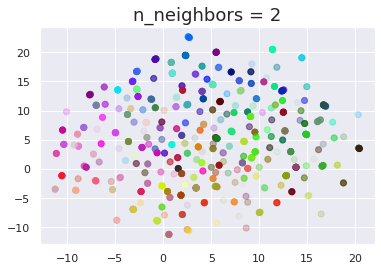

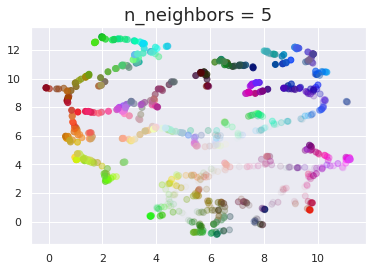

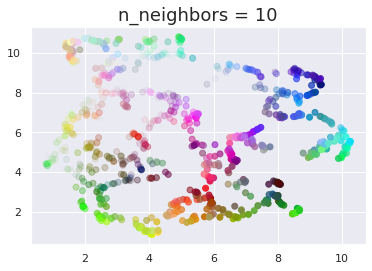

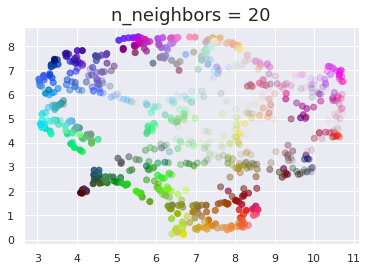

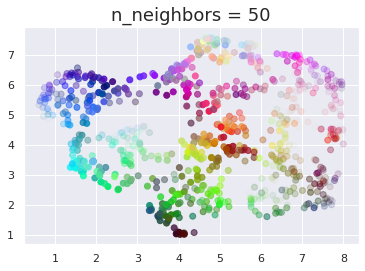

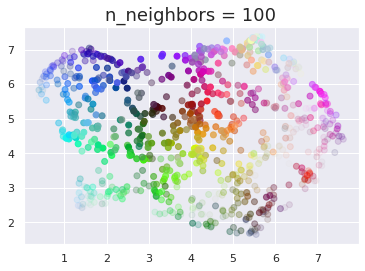

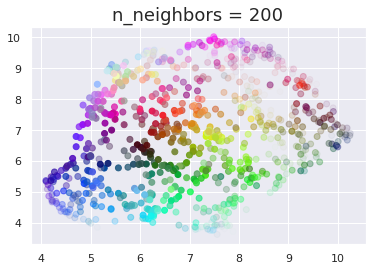

In [68]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [ ]:
draw_umap(n_components=1, title='n_components = 1')

In [ ]:
draw_umap(n_components=3, title='n_components = 3')

In [69]:
import numba

In [70]:
@numba.njit()
def hue(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin
    if cmax == r:
        return ((g - b) / delta) % 6
    elif cmax == g:
        return ((b - r) / delta) + 2
    else:
        return ((r - g) / delta) + 4

@numba.njit()
def lightness(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    return (cmax + cmin) / 2.0

@numba.njit()
def saturation(r, g, b):
    cmax = max(r, g, b)
    cmin = min(r, g, b)
    chroma = cmax - cmin
    light = lightness(r, g, b)
    if light == 1:
        return 0
    else:
        return chroma / (1 - abs(2*light - 1))


In [71]:
@numba.njit()
def red_channel_dist(a,b):
    return np.abs(a[0] - b[0])

@numba.njit()
def sl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2

@numba.njit()
def hue_dist(a, b):
    diff = (hue(a[0], a[1], a[2]) - hue(b[0], b[1], b[2])) % 6
    if diff < 0:
        return diff + 6
    else:
        return diff

@numba.njit()
def hsl_dist(a, b):
    a_sat = saturation(a[0], a[1], a[2])
    b_sat = saturation(b[0], b[1], b[2])
    a_light = lightness(a[0], a[1], a[2])
    b_light = lightness(b[0], b[1], b[2])
    a_hue = hue(a[0], a[1], a[2])
    b_hue = hue(b[0], b[1], b[2])
    return (a_sat - b_sat)**2 + (a_light - b_light)**2 + (((a_hue - b_hue) % 6) / 6.0)

/home/vivoli/.local/lib/python3.7/site-packages/umap_learn-0.5.1-py3.7.egg/umap/umap_.py:1750: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  "custom distance metric does not return gradient; inverse_transform will be unavailable. "
/home/vivoli/.local/lib/python3.7/site-packages/umap_learn-0.5.1-py3.7.egg/umap/umap_.py:1750: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  "custom distance metric does not return gradient; inverse_transform will be unavailable. "
/home/vivoli/.local/lib/python3.7/site-packages/umap_learn-0.5.1-py3.7.egg/umap/umap_.py:1750: UserWarning: custom distance metric does not re

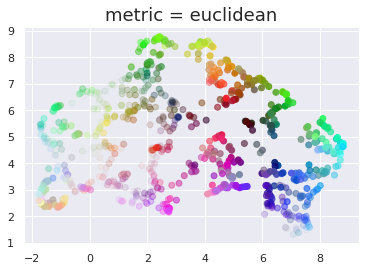

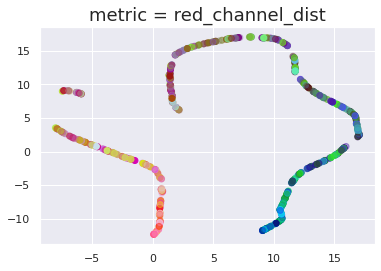

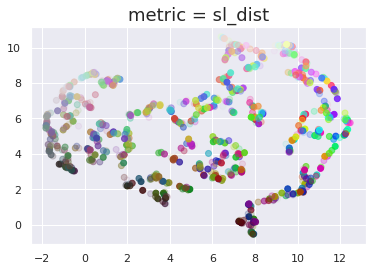

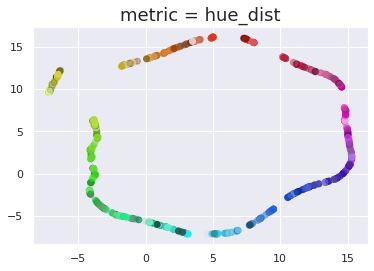

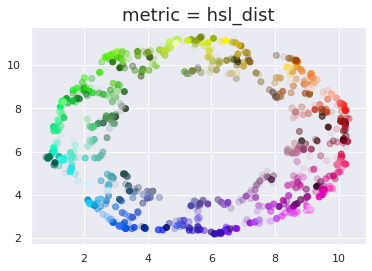

In [72]:
for m in ("euclidean", red_channel_dist, sl_dist, hue_dist, hsl_dist):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

# 3d interaction
---
---

In [39]:
import ipyvolume as ipv
import numpy as np

In [40]:
x, y, z = np.random.random((3, 10000))
ipv.quickscatter(x, y, z, size=1, marker="sphere")

In [73]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


/home/vivoli/miniconda3/envs/arxiv-manipulation/lib/python3.7/site-packages/ipyvolume/serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0] ** 2 + gradient[1] ** 2 + gradient[2] ** 2)
